In [1]:
from itertools import combinations
import pandas as pd
import time

tilebag = ['A']*9+['B']*2+['C']*2+['D']*4+['E']*12+\
          ['F']*2+['G']*3+['H']*2+['I']*9+['J']*1+\
          ['K']*1+['L']*4+['M']*2+['N']*6+['O']*8+\
          ['P']*2+['Q']*1+['R']*6+['S']*4+['T']*6+\
          ['U']*4+['V']*2+['W']*2+['X']*1+['Y']*2+\
          ['Z']*1+['?']*2
            
%matplotlib notebook

Find all leaves up to length maximum_superleave_length (takes a couple of minutes for length of 6)

In [ ]:
t0 = time.time()

maximum_superleave_length = 6
leaves = {i:sorted(list(set(list(combinations(tilebag,i))))) for i in 
          range(1,maximum_superleave_length+1)}

for i in range(1,maximum_superleave_length+1):
    leaves[i] = [''.join(leave) for leave in leaves[i]]
    
t1 = time.time()
print('Calculated superleaves up to length {} in {} seconds'.format(
    maximum_superleave_length,t1-t0))

In [ ]:
all_leaves = []

for i in range(1,maximum_superleave_length+1):
    all_leaves += leaves[i]

Load in current file with ev

In [ ]:
leaves_file = 'leave_values_010619_v3.csv'
df = pd.read_csv(leaves_file)

In [ ]:
df = df.rename(columns={'Unnamed: 0':'leave'})
df = df.set_index('leave')
ev_dict = df['ev'].to_dict()
synergy_dict = df['synergy'].to_dict()

Function below calculates a "pseudo-superleave" based on the values of the tiles and the synergy between each pair of tiles.

Gives unreasonable results in cases with lots of multiples, so I put an artificial floor of -30 (where -35 would be a score of 0).

In [ ]:
def calculate_pseudo_ev(leave,ev,synergy):
    raw_values = sum([ev[c] for c in leave])
    synergies = sum([synergy[''.join(combo)] for combo in list(combinations(leave,2))])
    return max(raw_values+synergies,-30)

In [ ]:
pseudo_ev_series = pd.Series({leave: calculate_pseudo_ev(leave,ev_dict,synergy_dict) 
                  for leave in all_leaves},name='pseudo_ev')

In [ ]:
pseudo_ev_series.to_csv('pseudo_superleaves_010819.csv')

Quick proof of concept below that the pseudo-superleaves are at least getting us somewhat close.

In [15]:
df['leave'] = df.index

In [17]:
df['pseudo_ev'] = df['leave'].apply(lambda x: calculate_pseudo_ev(x,ev_dict,synergy_dict))

In [21]:
df['ev_offset'] = df['pseudo_ev']-df['ev']

<IPython.core.display.Javascript object>


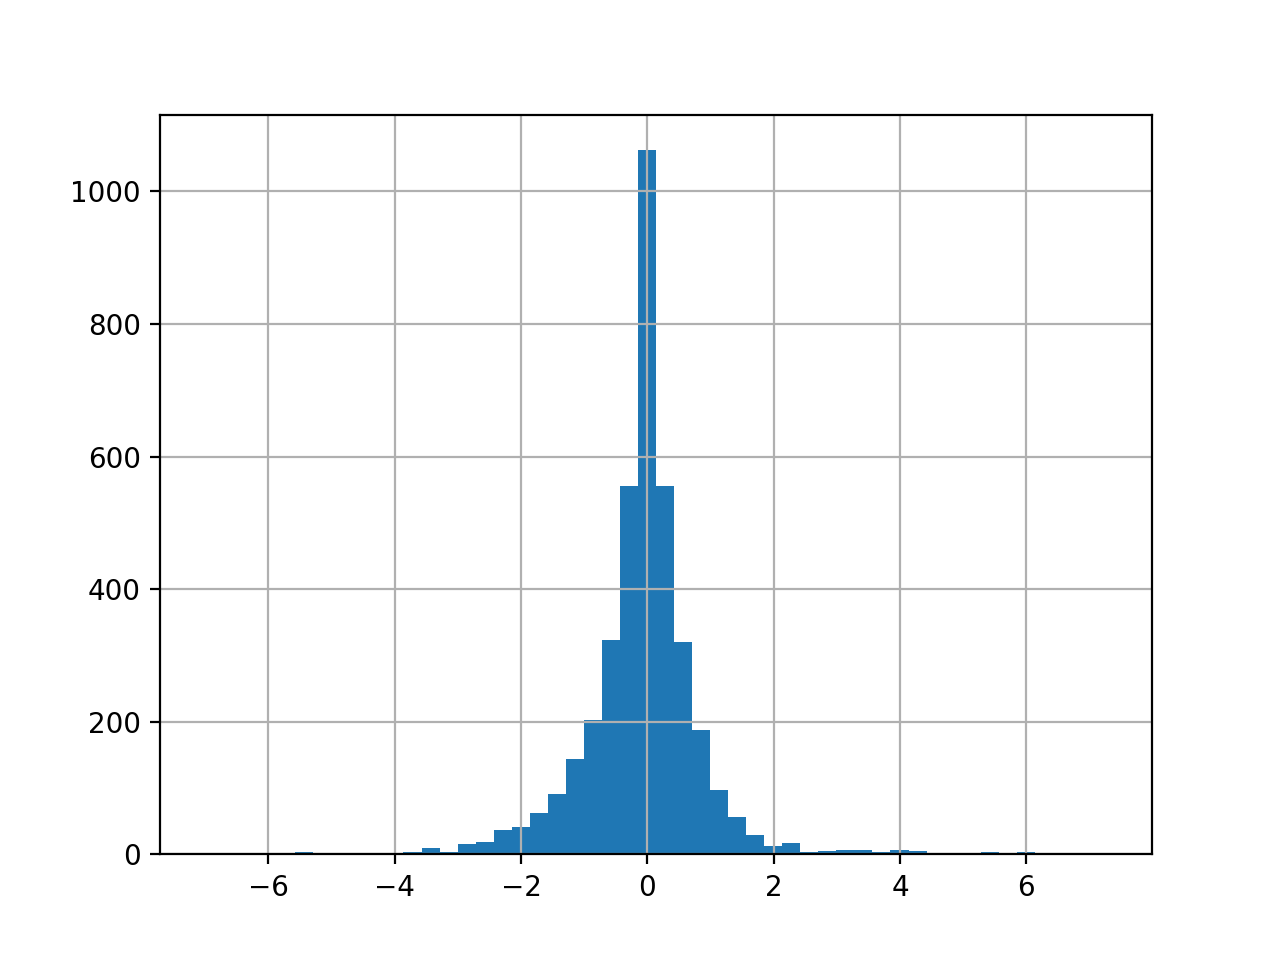

In [25]:
df['ev_offset'].hist(bins=50)